Enter the height, initial velocity, and angle of the projectile all separated by a space: 20 30 60
Hardcoded velocity: 


Hardcoded distance: 


Derived horizontal velocity: 


Derived vertical velocity: 


Derived horizontal displacement: 


Derived vertical displacement: 


Derived horizontal velocity with user inputs: 


Derived vertical velocity with user inputs: 


Derived horizontal displacement with user inputs: 


Derived vertical displacement with user inputs: 


Max height achieved:  54.4387755102041
Time of max height:  2.65109817485033
Range of projectile:  89.7638694729419


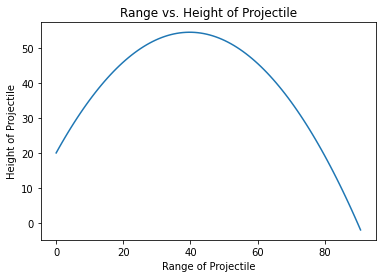

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
from matplotlib import animation
import math
from scipy.integrate import odeint
from sympy import *
init_printing()
%matplotlib inline

#Getting initial user inputs
userIn = input("Enter the height, initial velocity, and angle of the projectile all separated by a space: ")
userList = userIn.split()
hgt = float(userList[0])
vel = float(userList[1])
ang = float(userList[2])

#Setting converting user input to radians for the angle
ang = math.radians(ang)

#Gravity
g = 9.8

#Hardcoded equations
t = symbols('t')
a = symbols('a')
v0 = symbols('v0')
s0 = symbols('s0')
ax = symbols('ax')
ay = symbols('ay')
theta = symbols("\\theta")
v = Function('v')
s = Function('s')

eqA = Eq(v(t), a*t + v0)
eqA2 = a*t + v0
eqB = Eq(s(t), (a*t**2)/2 + v0*t +s0)
eqB2 = (a*t**2)/2 + v0*t +s0
#Horizontal velocity
eq1 = eqA.subs({a:ax, v0:v0*cos(theta)})
eq1B = eqA2.subs({a:ax, v0:v0*cos(theta)})
#Vertical velocity
eq2 = eqA.subs({a:ay, v0:v0*sin(theta)})
eq2B = eqA2.subs({a:ay, v0:v0*sin(theta)})
#Horizontal displacement
eq3 = eqB.subs({a:ax, v0:v0*cos(theta)})
eq3B = eqB2.subs({a:ax, v0:v0*cos(theta)})
#Vertical displacement
eq4 = eqB.subs({a:ay, v0:v0*sin(theta)})
eq4B = eqB2.subs({a:ay, v0:v0*sin(theta)})

#Pretty printing equations without variables filled in
print("Hardcoded velocity: ")
display(eqA)
print("Hardcoded distance: ")
display(eqB)
print("Derived horizontal velocity: ")
display(eq1)
print("Derived vertical velocity: ")
display(eq2)
print("Derived horizontal displacement: ")
display(eq3)
print("Derived vertical displacement: ")
display(eq4)

#Printing derived equations with user inputs
print("Derived horizontal velocity with user inputs: ")
eq5 = eq1.subs({ax:0, theta:ang, v0: vel})
eq9 = eq1B.subs({ax:0, theta:ang, v0: vel})
display(eq5)
print("Derived vertical velocity with user inputs: ")
eq6 = eq2.subs({ay:-g, v0:vel, theta:ang})
eq10 = eq2B.subs({ay:-g, v0:vel, theta:ang})
display(eq6)
print("Derived horizontal displacement with user inputs: ")
eq7 = eq3.subs({ax:0, v0:vel, s0:0, theta:ang})
eq11 = eq3B.subs({ax:0, v0:vel, s0:0, theta:ang})
display(eq7)
print("Derived vertical displacement with user inputs: ")
eq8 = eq4.subs({ay:-g, v0:vel, s0:hgt, theta:ang})
eq12 = eq4B.subs({ay:-g, v0:vel, s0:hgt, theta:ang})
display(eq8)

#Variables to find
#mTime = solve(eq6.subs({v(t):0}))
mTime = solve(eq10,t)
mHgt = eq12.subs({t:mTime[0]})
mRangeTime = solve(eq12, t)
mRange = eq11.subs({t:mRangeTime[1]})

#Printing desired values
print("Max height achieved: ", mHgt)
print("Time of max height: ", mTime[0])
print("Range of projectile: ", mRange)

#Getting numbers for plotting
x = np.arange(102, dtype=float)
y = np.arange(102, dtype=float)
timegap = mRangeTime[1] / 100.00
currT = 0
for p in range(0,102):
    x[p] = eq11.subs({t:currT})
    y[p] = eq12.subs({t:currT})
    currT = currT + timegap

#Plotting
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_title("Range vs. Height of Projectile");
ax.set_xlabel("Range of Projectile");
ax.set_ylabel("Height of Projectile");

#Attempting animation
#fig2, ax2 = plt.subplots()
#t = np.arange(0, mRangeTime[1], 0.01)
#y = np.arange(0, mRangeTime[1], 0.01)
#line, = ax2.plot(x, vel * sin(ang) * x - (0.5) * -g * x**2 + hgt)

#def animate(i):
    #line.set_xdata(vel * cos(ang) * (t + i /100.0))
    #line.set_ydata(vel * sin(ang) * (x + i /100.0) - (0.5) * -g * (x + i / 100.0)**2)  
    #return line,

#ani = animation.FuncAnimation(fig2, animate, np.arange(1, 200))
#plt.show()